# Домашнее задание 1: Numpy

# Разминка

Прочитайте про типизацию в Python: 
https://tproger.ru/articles/python-typing/ 

In [1]:
from typing import List, Union

Num = Union[int, float]

0. Импортируйте numpy и убедитесь, что импорт прошёл без ошибок. 

In [2]:
import numpy as np

1. Реализуйте векторное умножение (dot product) двух списков типа Python list на чистом Python (используя цикл, без дополнительных библиотек) как фукнцию pure_python_dot_product.

In [5]:
def pure_python_dot_product(l1: List[Num], l2: List[Num]) -> float:
    dot = 0
    if len(l1) != len(l2):
        return dot
    dot = [l1[i]*l2[i] for i in range(len(l1))]
    return dot

In [6]:
l1 = [1, 4, 3]
l2 = [2, 1, 3]
pure_python_dot_product(l1, l2)

[2, 4, 9]

In [8]:
a = np.array(l1)
b = np.array(l2)
a * b

array([2, 4, 9])

2. За что отвечает функция assert?

In [ ]:
# ваш ответ тут

3. Замерьте скорость работы python_pure_dot_product на списках a и b, используя Jupyter magic %%timeit.

In [10]:
a = range(1,10000,2)
b = range(20000,40000, 4)
assert len(a) == len(b)

In [11]:
%timeit pure_python_dot_product(a, b)

1.62 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


4. Реализуйте векторное умножение двух массивов типа ndarray, используя Numpy как функицю numpy_dot_product. В параметрах функции numpy_dot_product определите тип входящих переменных.

In [12]:
def numpy_dot_product(l1: np.ndarray, l2: np.ndarray) -> float:
    dot = l1 * l2    
    return dot

5. Преобразуйте списки a, b в массивы Numpy, запишите их соответственно в переменные a_ar, b_ar.

In [14]:
# ваш код тут
a_ar = np.array(a)
b_ar = np.array(b)

6. Замерьте скорость работы numpy_dot_product на массивах a_ar и b_ar, используя Jupyter magic %%timeit.

In [15]:
%timeit numpy_dot_product(a_ar, b_ar)

5 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Чтение из файла. Использование функций Numpy

https://www.cs.toronto.edu/~frossard/post/linear_regression/

1. Считайте в переменную data_x данные из файла 'data_x.npy' и выведите первые 5 элементов data_x.

In [43]:
data_x = np.load('data_x.npy')
data_x[:5]

array([[0.1       ],
       [0.10909091],
       [0.11818182],
       [0.12727273],
       [0.13636364]])

2. Считайте в переменную data_y данные из файла 'data_y.txt' и выведите первые 5 элементов data_y.

In [23]:
data_y = np.loadtxt('data_y.txt')
data_y[:5]

array([ 1.10668682, -0.1165718 ,  0.15178231,  0.52171016,  1.2676443 ])

Давайте визуализируем загруженные данные.  
Для этого импортируем pyplot и выполняем простую визуализацию. Разбор визуализаций будет далее в курсе. Но если вы уже сейчас разберётесь, что делает код - будет отлично!

Если у вас не импортируется matplotlib, надо его установить через pip / conda.

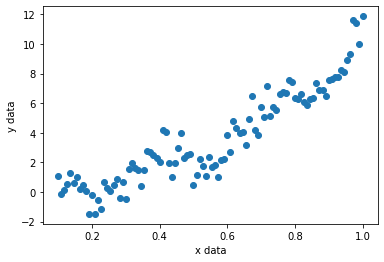

In [26]:
from matplotlib import pyplot as plt

plt.scatter(data_x, data_y)
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

3. С помощью numpy найдите максимум, минимум и форму (shape) x и y.

In [29]:
min_x = data_x.min()
max_x = data_x.max() # ваш код тут
shape_x = data_x.shape # ваш код тут

min_y = data_y.min() # ваш код тут
max_y = data_y.max() # ваш код тут
shape_y = data_y.shape # ваш код тут

min_x, max_x, shape_x, min_y, max_y, shape_y

(0.1, 1.0, (100, 1), -1.4798856735208457, 11.870796258618977, (100,))

На графике заметно, что между х и у есть некоторая зависимость. Давайте её смоделируем с помощью линейной регресии, написанной на numpy. Решать задачу линейной регресии будем с помощью методов наименших квадратов.

4. Для построения линейной регрессии нам надо добавить столбец единичек к data_x как, чтоб в итоге data_x имел вид :
```
array([[1.        , 0.1       ],
          [1.        , 0.10909091],
          [1.        , 0.11818182],
          [1.        , 0.12727273],
          [1.        , 0.13636364],
          ......
         ]])
```

Используя функции numpy hstack и ones_like, добавьте столбец единичек к матрице data_x.

In [44]:
data_x = np.hstack((np.ones_like(data_x), data_x))


In [45]:
data_x

array([[1.        , 0.1       ],
       [1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.12727273],
       [1.        , 0.13636364],
       [1.        , 0.14545455],
       [1.        , 0.15454545],
       [1.        , 0.16363636],
       [1.        , 0.17272727],
       [1.        , 0.18181818],
       [1.        , 0.19090909],
       [1.        , 0.2       ],
       [1.        , 0.20909091],
       [1.        , 0.21818182],
       [1.        , 0.22727273],
       [1.        , 0.23636364],
       [1.        , 0.24545455],
       [1.        , 0.25454545],
       [1.        , 0.26363636],
       [1.        , 0.27272727],
       [1.        , 0.28181818],
       [1.        , 0.29090909],
       [1.        , 0.3       ],
       [1.        , 0.30909091],
       [1.        , 0.31818182],
       [1.        , 0.32727273],
       [1.        , 0.33636364],
       [1.        , 0.34545455],
       [1.        , 0.35454545],
       [1.        , 0.36363636],
       [1.

Наш датасет готов. Теперь нам надо его случайным образом разделить на train и test части. Это стандартная процедура в решении задач машинного обучения. Мы считаем, что test часть - это данные, которые не видила модель, и оценка целевой метрики на этом фрагменте данных даёт нам основания полагать, как модель будет себя вести на новых данных, которые мы ей "скормим" после завершения разработки. Тренировочные данные обычно нужны только для обучения весов, а для задач бизнеса модель запускается на новых для неё данных. Мы будем говорить о разбитии датасета на несколько частей ещё в следующих лекциях.

5. Наши данные похоже имеют тренд (значение y растёт со временем). Поэтому перед разделением данных мы не будем их перемешивать, как это часто делают.  
Мы возьмём в test выборку последние 20 строк данных, а в трейн выборку - всё остальное. Создайте data_x, test_y, train_x, train_y, используя количество строк для теста, указанное в переменной portion.

In [46]:
portion = 20

test_x = data_x[-portion:]
test_y = data_y[-portion:]
train_x = data_x[:-portion]
train_y = data_y[:-portion]

Чтобы посмотреть, как разделились в случае правильной имплементации наши данные на трейн и тест выборки, запустите код ниже.

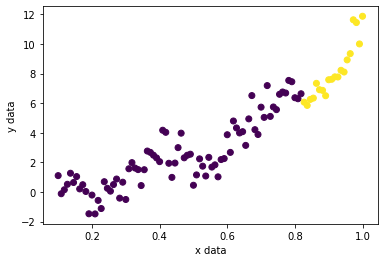

In [64]:
train_test_labels = [0]*(data_x.shape[0] - portion) + [1] * portion

plt.scatter(data_x[:,1], data_y, c=train_test_labels)
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

Видим, что тест - это последние 20% данных, которые другого цвета на графике.

6. Теперь нам надо написать функцию поиска весов в линейной регресии. В этом вам помогут слайды с лекции. Найдите формулу для w и реализуйте её с помощью numpy. 

Используйте для поиска w train_x и train_y данные.

Помните, что в формуле у нас происходит матричное умножение.

Количество весов должно быть равно количеству колонок в train_x.


In [73]:
a = np.dot(train_x.T, train_x)
a = a ** -1
a = np.dot(a, train_x.T)
a = np.dot(a, train_y)

In [77]:
a

array([ 6.02454395, 11.81429456])

In [75]:
# ваш код тут
w = np.dot(np.dot(np.dot(train_x.T, train_x)**-1, train_x.T), train_y)

In [76]:
w

array([ 6.02454395, 11.81429456])

7. Давайте теперь посмотрим на то, как выглядит то предсказание, которое строит наша модель с найденными весами.  

Для начала напишем функцию, которая будет нам возвращать предсказания для заданного набора x и параметров модели w.  
Функция `get_predict` должна возвращать произведение марицы x на w. Размерность возращаемого значения должна быть равна количеству строк в x.

In [ ]:
def get_predict(x, w):
    return 0 # ваш код тут

In [ ]:
train_predict = get_predict(train_x, w)
test_predict = get_predict(test_x, w)
full_data_predict = get_predict(data_x, w)

In [ ]:
train_test_labels = [0] * (data_x.shape[0] - portion) + [1] * portion

plt.figure(figsize=(10,6))
plt.scatter(data_x[:,1], data_y, c=train_test_labels)
plt.plot(data_x[:,1], full_data_predict, color = "green", label = 'prediction')
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()
plt.show()

Можем видеть, что мы неплохо угадали направление тренировочных данных, но не угадали динамику. Также на тестовой выборке в самом конце мы сильно ошибаемся (данные идут вверх более стремительно, чем линия предсказания).  

Можем посмотреть отдельно на тестовой и тренировочной выборках взаимное расположение данных и предсказаний.   
Запустите две клетки ниже.

In [ ]:
plt.scatter(train_x[:,1], train_y, color = "red", label='real data')
plt.plot(train_x[:,1], train_predict, color = "green", label = 'prediction')
plt.title("Model vs real data (Training set)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
plt.scatter(test_x[:,1], test_y, color = "blue", label='real data')
plt.plot(test_x[:,1], test_predict, color = "green", label = 'prediction')
plt.title("Model vs real data (Test set)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Видим, что действительно, линия проходит ниже большинства точек тестового набора данных. Модель точно можно улучшить.

Далее в курсе мы научимся это делать :)